In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely

In [2]:
## NYC bike routes map
routes = gpd.read_file('/Users/yuzetoh/Documents/NYU/PUI/New York City Bike Routes/geo_export_519ed14d-7bc9-4ec9-825f-92449ec03538.shp')
routes.head()

,allclasses,bikedir,boro,comments,facilitycl,fromstreet,ft2facilit,ft_facilit,lanecount,onoffst,segmentid,shape_le_1,street,tf2facilit,tf_facilit,tostreet,geometry
0,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,53.0,131.771990,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24993 40.50088, -74.24969 40.5..."
1,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,57.0,268.689582,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24916 40.49872, -74.24935 40.4..."
2,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,59.0,420.193253,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24935 40.49944, -74.24969 40.5..."
3,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,61.0,238.242198,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.25185 40.50281, -74.25177 40.5..."
4,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,64.0,646.293832,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.25133 40.50229, -74.24993 40.5..."


In [21]:
zips=gpd.read_file('/Users/yuzetoh/Documents/NYU/PUI/ZIP_CODE_040114/ZIP_CODE_040114.shp')
zips

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [4]:
streets=gpd.read_file('/Users/yuzetoh/Documents/NYU/PUI/NYC Street Centerline (CSCL)/geo_export_c4957ed5-c796-4636-ad56-4e1d0d73f3cd.shp')
streets.head()

,bike_lane,bike_trafd,borocode,date_creat,time_creat,frm_lvl_co,full_stree,l_blkfc_id,l_high_hn,l_low_hn,...,rw_type,shape_leng,snow_pri,st_label,st_name,st_width,status,to_lvl_co,trafdir,geometry
0,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,2.122626e+08,64,50,...,1.0,262.777812,C,BATTERY PL,BATTERY,42.0,2,13.0,TW,"LINESTRING (-74.01793 40.70617, -74.01787 40.7..."
1,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,1.222601e+09,82,66,...,1.0,259.415989,C,BATTERY PL,BATTERY,42.0,2,13.0,TW,"LINESTRING (-74.01757 40.70684, -74.01712 40.7..."
2,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,1.222601e+09,98,84,...,1.0,280.444781,C,BATTERY PL,BATTERY,42.0,2,13.0,TW,"LINESTRING (-74.01712 40.70746, -74.01663 40.7..."
3,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,2.122626e+08,None,None,...,1.0,32.070139,C,BATTERY PL,BATTERY,42.0,2,13.0,TW,"LINESTRING (-74.01694 40.70481, -74.01705 40.7..."
4,None,None,1,2011-04-22,00:00:00.000,13.0,BATTERY PL,2.122626e+08,None,None,...,1.0,206.271850,C,BATTERY PL,BATTERY,24.0,2,13.0,TF,"LINESTRING (-74.01429 40.70455, -74.01437 40.7..."


In [5]:
routes = routes.to_crs(2263)

In [6]:
routes.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
zips = zips.to_crs(2263)

In [8]:
zips.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
routes_with_zips=gpd.sjoin(routes,zips,op='within',how='left')
routes_with_zips

/Users/yuzetoh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,allclasses,bikedir,boro,comments,facilitycl,fromstreet,ft2facilit,ft_facilit,lanecount,onoffst,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
0,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,...,Staten Island,14096.0,4.602838e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0
1,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,...,Staten Island,14096.0,4.602838e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0
2,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,...,Staten Island,14096.0,4.602838e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0
3,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,...,Staten Island,14096.0,4.602838e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0
4,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,...,Staten Island,14096.0,4.602838e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20819,I,2,4.0,None,I,DOUGLASTON PKWY,None,Protected Path,2.0,ON,...,Bayside,28496.0,5.016352e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0
20820,I,2,4.0,None,I,NORTHERN BLVD,None,Greenway,2.0,OFF,...,Bayside,28496.0,5.016352e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0
20821,II,2,3.0,None,II,PACIFIC ST,None,Curbside,2.0,ON,...,Brooklyn,46664.0,2.942942e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
20822,II,2,3.0,None,II,PACIFIC ST,None,Curbside,2.0,ON,...,Brooklyn,46664.0,2.942942e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0


In [10]:
routes_with_zips.columns.values

array(['allclasses', 'bikedir', 'boro', 'comments', 'facilitycl',
       'fromstreet', 'ft2facilit', 'ft_facilit', 'lanecount', 'onoffst',
       'segmentid', 'shape_le_1', 'street', 'tf2facilit', 'tf_facilit',
       'tostreet', 'geometry', 'index_right', 'ZIPCODE', 'BLDGZIP',
       'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS',
       'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN'], dtype=object)

In [11]:
bike_lane_lenth_by_zipcode = routes_with_zips.groupby(['ZIPCODE']).\
                            agg({'shape_le_1':'sum'}).reset_index()

bike_lane_lenth_by_zipcode.rename(columns = {'shape_le_1':'Total Bike Lane Length'}, inplace = True)
bike_lane_lenth_by_zipcode

,ZIPCODE,Total Bike Lane Length
0,00083,46776.539527
1,10001,30803.228127
2,10002,86573.507773
3,10003,35837.435983
4,10004,39737.293362
...,...,...
173,11691,23852.161951
174,11692,12824.587872
175,11693,57758.395802
176,11694,41320.461842


In [12]:
streets = streets.to_crs(2263)

In [13]:
streets_with_zips=gpd.sjoin(streets,zips,op='within',how='left')
streets_with_zips

/Users/yuzetoh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,bike_lane,bike_trafd,borocode,date_creat,time_creat,frm_lvl_co,full_stree,l_blkfc_id,l_high_hn,l_low_hn,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
0,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,2.122626e+08,64,50,...,New York,3170.0,2.234114e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0
1,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,1.222601e+09,82,66,...,New York,3170.0,2.234114e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0
2,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,1.222601e+09,98,84,...,New York,3170.0,2.234114e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0
3,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,2.122626e+08,None,None,...,New York,3170.0,2.234114e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0
4,None,None,1,2011-04-22,00:00:00.000,13.0,BATTERY PL,2.122626e+08,None,None,...,New York,2187.0,4.002521e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120972,None,None,4,2007-11-29,00:00:00.000,17.0,ED KOCH BR UPPER RY AP,1.022616e+08,None,None,...,Long Island City,26254.0,7.896209e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0
120973,None,None,4,2007-11-29,00:00:00.000,17.0,ED KOCH BR UPPER RY AP,1.022616e+08,None,None,...,Long Island City,26254.0,7.896209e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0
120974,None,None,1,2007-11-29,00:00:00.000,13.0,W 44 ST,1.222606e+09,598,506,...,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
120975,1,TW,4,2007-11-29,00:00:00.000,17.0,KOCH BR PEDESTRIAN AND BIKE PATH,0.000000e+00,None,None,...,Long Island City,26254.0,7.896209e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0


In [14]:
streets_with_zips.columns.values

array(['bike_lane', 'bike_trafd', 'borocode', 'date_creat', 'time_creat',
       'frm_lvl_co', 'full_stree', 'l_blkfc_id', 'l_high_hn', 'l_low_hn',
       'l_zip', 'date_modif', 'time_modif', 'physicalid', 'post_direc',
       'post_modif', 'post_type', 'pre_direct', 'pre_modifi', 'pre_type',
       'r_blkfc_id', 'r_high_hn', 'r_low_hn', 'r_zip', 'rw_type',
       'shape_leng', 'snow_pri', 'st_label', 'st_name', 'st_width',
       'status', 'to_lvl_co', 'trafdir', 'geometry', 'index_right',
       'ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN'],
      dtype=object)

In [15]:
street_lenth_by_zipcode = streets_with_zips.groupby(['ZIPCODE']).\
                            agg({'shape_leng':'sum'}).reset_index()
street_lenth_by_zipcode.rename(columns = {'shape_leng':'Total Street Length'}, inplace = True)
street_lenth_by_zipcode

,ZIPCODE,Total Street Length
0,00083,148882.837813
1,10001,85976.261345
2,10002,209546.607603
3,10003,69541.059286
4,10004,86456.201388
...,...,...
185,11691,355158.588411
186,11692,119077.065388
187,11693,149353.171316
188,11694,238916.209961


In [16]:
zipcode_level=street_lenth_by_zipcode.merge(bike_lane_lenth_by_zipcode, left_on='ZIPCODE', right_on='ZIPCODE')
zipcode_level

,ZIPCODE,Total Street Length,Total Bike Lane Length
0,00083,148882.837813,46776.539527
1,10001,85976.261345,30803.228127
2,10002,209546.607603,86573.507773
3,10003,69541.059286,35837.435983
4,10004,86456.201388,39737.293362
...,...,...,...
173,11691,355158.588411,23852.161951
174,11692,119077.065388,12824.587872
175,11693,149353.171316,57758.395802
176,11694,238916.209961,41320.461842


In [17]:
zipcode_level['Bike Lane Density'] = zipcode_level['Total Bike Lane Length']/zipcode_level['Total Street Length']
zipcode_level

,ZIPCODE,Total Street Length,Total Bike Lane Length,Bike Lane Density
0,00083,148882.837813,46776.539527,0.314184
1,10001,85976.261345,30803.228127,0.358276
2,10002,209546.607603,86573.507773,0.413147
3,10003,69541.059286,35837.435983,0.515342
4,10004,86456.201388,39737.293362,0.459623
...,...,...,...,...
173,11691,355158.588411,23852.161951,0.067159
174,11692,119077.065388,12824.587872,0.107700
175,11693,149353.171316,57758.395802,0.386724
176,11694,238916.209961,41320.461842,0.172950


In [22]:
zipcode_level_plot=zips.merge(zipcode_level.reset_index(drop=False), on='ZIPCODE', how='left')
zipcode_level_plot

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,index,Total Street Length,Total Bike Lane Length,Bike Lane Density
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",NaN,NaN,NaN,NaN
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",105.0,146367.805288,28632.146155,0.195618
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",104.0,215912.786687,40575.901547,0.187927
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",117.0,114141.251961,26079.822125,0.228487
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",110.0,208355.389994,24186.845000,0.116085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",57.0,235928.092074,19882.872299,0.084275
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",175.0,149353.171316,57758.395802,0.386724
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",131.0,98504.313147,36952.712403,0.375138
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",NaN,NaN,NaN,NaN


In [23]:
sanity = ['ZIPCODE','geometry','Bike Lane Density']
zipcode_level_plot=zipcode_level_plot[sanity]
zipcode_level_plot

,ZIPCODE,geometry,Bike Lane Density
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",NaN
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",0.195618
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",0.187927
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",0.228487
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",0.116085
...,...,...,...
258,10310,"POLYGON ((950767.507 172848.969, 950787.510 17...",0.084275
259,11693,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",0.386724
260,11249,"POLYGON ((995877.318 203206.075, 995968.511 20...",0.375138
261,10162,"POLYGON ((997731.761 219560.922, 997641.948 21...",NaN


Text(0.5, 1.0, 'Bicycle Lane Density by Zip Code')

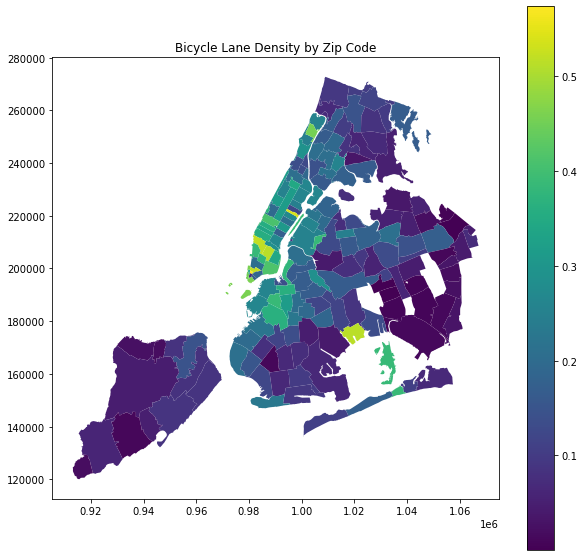

In [24]:
zipcode_level_plot.plot(figsize = (10,10),column = 'Bike Lane Density',legend=True).set_title("Bicycle Lane Density by Zip Code")
